# Copy and Paste & Alpha Blending

**Goal**: In this project, you will experience different kinds of techniques for image blending. Basically, you are trying to add an object of interests into a target background with the least artifacts. 

**Approach**:

*Copy and Paste*

*Alpha Blending*

*Gradient Domain Blending*

### Draw Mask

In this section, you will need to make your own mask for the object of interests.


Instructions:
1. Open python file named "createMask.py", and change the input image path into the image you want to modify on. 
2. For Mac user, open "terminal" and "cd" into the path of "createMask.py", then run "python createMask.py"; For Windows user, open "command prompt" and "cd" into the path of "createMask.py", then run "python createMask.py".
3. You will now see your input image. Left click the point on the image to make the boundary of the mask. Once the clicking is done, right click and then close the image.

### Import Packages

In [6]:
import numpy as np
from PIL import Image
from skimage.io import imsave
import matplotlib.pyplot as plt
import cv2

### Input Configurations

In [9]:
# Input Configuration
background_img_path = "TargetImage.png"
source_img_path = "SourceImage.png"
mask_path = 'masks/mask_source_object.txt'
source_img = np.array(Image.open(source_img_path).convert('RGB'))
print('source_img: ',source_img.shape)
background_img = np.array(Image.open(background_img_path).convert('RGB'))
print('background_img: ',background_img.shape)

x_start = 300
y_start = 300

source_img:  (100, 100, 3)


OSError: image file is truncated (6 bytes not processed)

### Data Preprocessing

In [3]:
# load background image, source image, mask
background_img = np.array(Image.open(background_img_path).convert('RGB'))
mask = np.loadtxt(mask_path)
imsave('mask.jpg', mask)
source_img = np.array(Image.open(source_img_path).convert('RGB'))
source_obj = np.zeros((source_img.shape[0], source_img.shape[1], 3))
for i in range(3):
    source_obj[:,:,i] = source_img[:,:,i]*mask

# create canvas source image and canvas mask
canvas_source_img = np.zeros((background_img.shape))
canvas_source_img[x_start:source_obj.shape[0]+x_start, y_start:source_obj.shape[1]+y_start] = source_obj
canvas_mask = np.zeros((background_img.shape[0], background_img.shape[1]))
canvas_mask[x_start:source_obj.shape[0]+x_start, y_start:source_obj.shape[1]+y_start] = mask

/Users/owen/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


### Directly Copy and Paste

/Users/owen/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


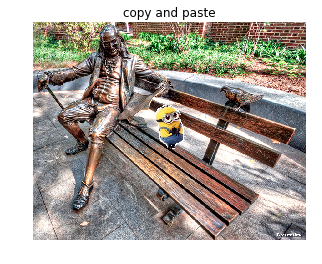

In [4]:
# directly copy and paste
mask_source = canvas_mask
mask_target = np.zeros((mask_source.shape))
for i in range(mask_source.shape[0]):
    for j in range(mask_source.shape[1]):
        if mask_source[i,j] == 0:
            mask_target[i,j] = 1
        else:
            mask_target[i,j] = 0
            
output_img = np.zeros((background_img.shape))
source_image = canvas_source_img
target_image = background_img
source_mask = mask_source
target_mask = mask_target
    
# TODO: complete the image copy and paste
for i in range(3):
    output_img[:,:,i] = source_image[:,:,i]*source_mask+target_image[:,:,i]*target_mask

plt.figure()
plt.imshow(output_img/255)
plt.axis('off')
plt.title('copy and paste')
imsave('outputs/copy_paste_output.jpg', output_img/255)

### Alpha Blending

/Users/owen/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: outputs/alpha_blending.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


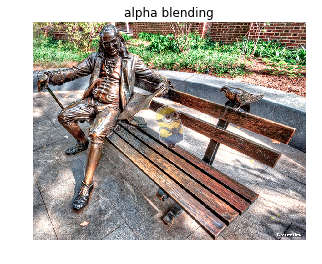

In [5]:
# alpha blending

mask_target_inverse = np.zeros((mask_target.shape))
for i in range(mask_target.shape[0]):
    for j in range(mask_target.shape[1]):
        if mask_target[i,j] == 1:
            mask_target_inverse[i,j] = 0
        else:
            mask_target_inverse[i,j] = 1
alpha = 0.5
target_mask_inverse = mask_target_inverse

# TODO: complete the alpha blending
for i in range(3):
    output_img[:,:,i] = source_image[:,:,i]*source_mask*alpha + target_image[:,:,i]*target_mask + target_image[:,:,i]*target_mask_inverse*(1-alpha)

plt.figure()
plt.imshow(output_img/255)
plt.axis('off')
plt.title('alpha blending')
imsave('outputs/alpha_blending.jpg', (output_img/255).astype('uint8'))

### Results Evaluation

You can now go to the folder named "outputs", and check the blending results from three different approaches. 